## Set-up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from  matplotlib.ticker import PercentFormatter
from sklearn.metrics import matthews_corrcoef
%matplotlib inline 

In [2]:
# loading the data
data = pd.read_csv("../data/default-of-credit-card-clients.csv",delimiter=';')

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.rename(columns={'default payment next month': 'default_payment_next_month'}, inplace=True)

[]

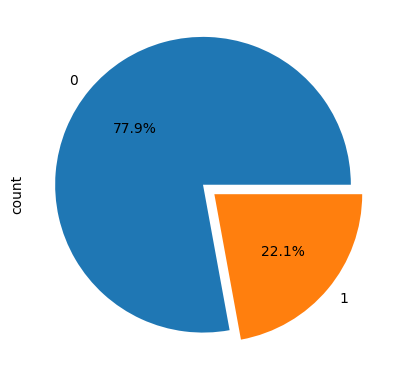

In [5]:

data['default_payment_next_month'].value_counts().plot(kind='pie',explode=[0.1,0],autopct="%1.1f%%")
plt.plot()

Of all customers, about 22% will not make their credit card debt payments on time.

## Correlation analysis

Correlation analysis is a fundamental statistical technique used in data science to explore relationships between variables. <br> 
It helps us understand the extent to which two variables are associated with each other. <br>
When working with dependent variables that can only take on two values, 0 or 1, such as in binary classification problems, one suitable correlation measure is the point-biserial correlation coefficient. <br>

The point-biserial correlation coefficient is specifically designed for situations where one variable is continuous and the other is dichotomous (binary). <br>
It quantifies the strength and direction of the linear relationship between these two types of variables. <br>

There are several reasons why point-biserial correlation is the appropriate choice for analyzing such data: <br>

Applicability to Binary Data: Since your dependent variable can only assume values of 0 or 1, the point-biserial correlation is well-suited to capture the association between this binary variable and a continuous predictor. <br>

Interpretable Results: The point-biserial correlation produces a value between -1 and 1, where -1 indicates a perfect negative relationship, 1 indicates a perfect positive relationship, and 0 implies no linear relationship. This makes the results easily interpretable. <br>

Widely Accepted Metric: Point-biserial correlation is a recognized and accepted metric in the field of statistics and data science, ensuring that your analysis is grounded in established methodology. <br>

Ease of Calculation: Point-biserial correlation can be calculated using standard statistical software packages, making it convenient for data scientists to implement. <br>

References: <br>
https://towardsdatascience.com/point-biserial-correlation-with-python-f7cd591bd3b1 <br>
https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pointbiserialr.html <br>



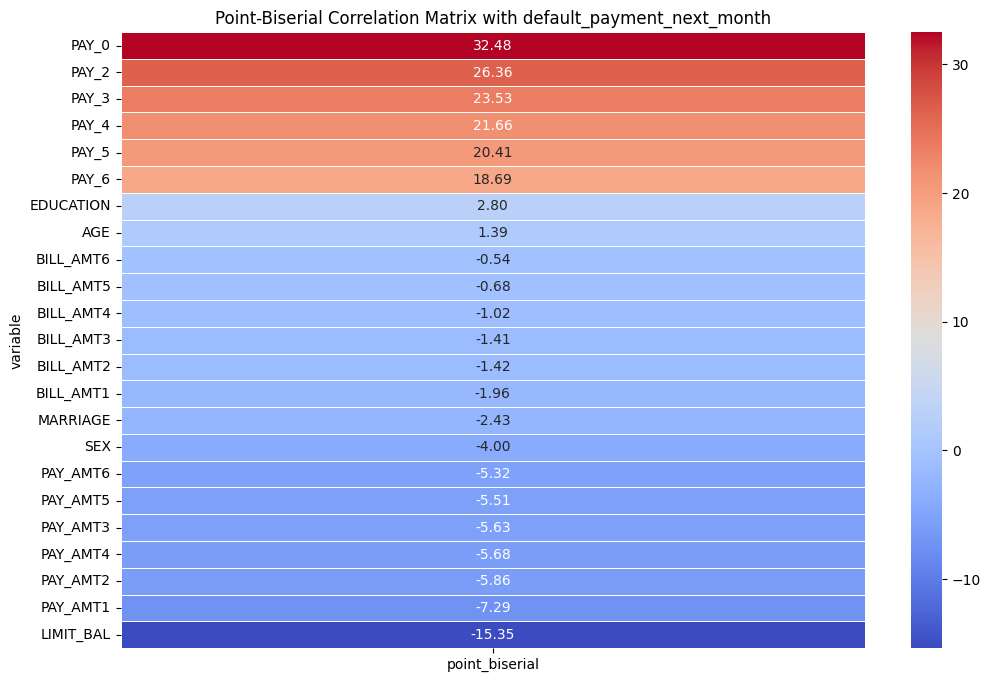

In [6]:
target_column = 'default_payment_next_month'
# Filter out non-numeric columns
numeric_columns = data.loc[:, ~data.columns.isin([target_column, 'ID'])]

# Create an empty DataFrame to store point-biserial correlations
correlation_with_target = pd.DataFrame(columns=['variable', 'point_biserial'])

# Iterate through numeric columns and calculate point-biserial correlation
for col in numeric_columns.columns:
    if col != target_column:
        point_biserial_corr, _ = stats.pointbiserialr(data[target_column], data[col])
        var_dict = {'variable': col, 'point_biserial': point_biserial_corr}
        var_df = pd.DataFrame.from_dict([var_dict])
        correlation_with_target = pd.concat([correlation_with_target,var_df], ignore_index=True)

# Sort the DataFrame by point-biserial correlation
correlation_with_target = correlation_with_target.sort_values(by='point_biserial', ascending=False)

# Create a heatmap of the point-biserial correlations
plt.figure(figsize=(12, 8))
main_corr = sns.heatmap(correlation_with_target.set_index('variable') * 100, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title(f'Point-Biserial Correlation Matrix with {target_column}')

plt.show()

none of the independent variables has a very high correlation with the dependent variable. <br>

In the next step the correlations between the subsets of independent variables will be analyzed.


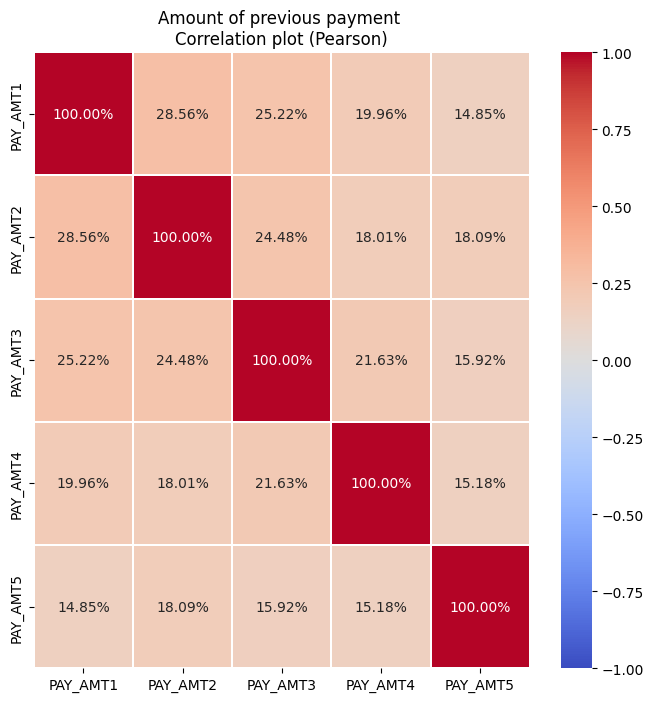

In [7]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize=(8, 8))
plt.title('Amount of previous payment \nCorrelation plot (Pearson)')
corr = data[var].corr()

# Create a heatmap of the correlations with percentages
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm',
            linewidths=.1, vmin=-1, vmax=1, annot=True, fmt=".2%")

plt.show()

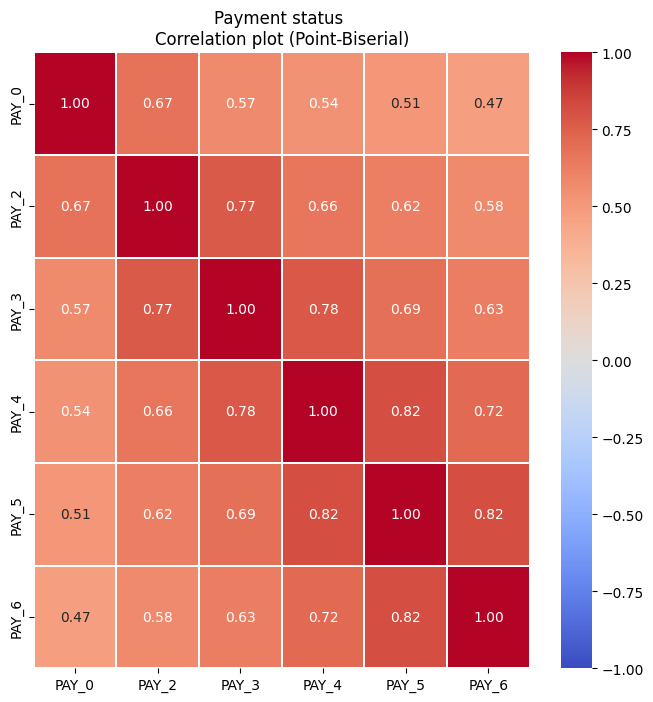

In [8]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(8, 8))
plt.title('Payment status \nCorrelation plot (Point-Biserial)')

# Calculate the point-biserial correlations
corr = pd.DataFrame(index=var, columns=var)

for i in var:
    for j in var:
        if i == j:
            corr.loc[i, j] = 1.0  # Diagonal elements are always 1
        else:
            corr_val, _ = stats.pointbiserialr(data[i], data[j])
            corr.loc[i, j] = corr_val

# Create a heatmap of the correlations with percentages
sns.heatmap(corr.astype(float), xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm',
            linewidths=.1, vmin=-1, vmax=1, annot=True, fmt=".2f")

plt.show()

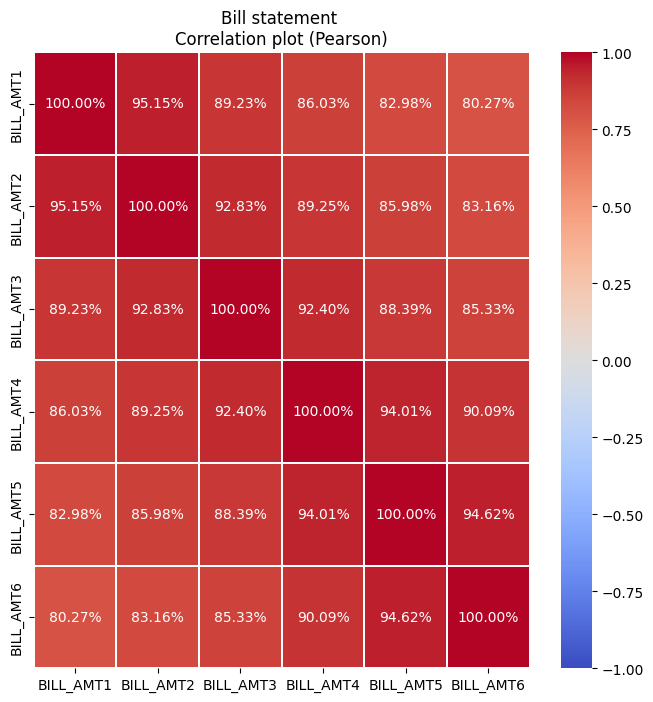

In [9]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize=(8, 8))
plt.title('Bill statement \nCorrelation plot (Pearson)')
corr = data[var].corr()

# Create a heatmap of the correlations with percentages
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm',
            linewidths=.1, vmin=-1, vmax=1, annot=True, fmt=".2%")

plt.show()

## Results
Column connected to Bill Statements and Payments status are highly correlated. <br>
It is not a ideal situation for machine learning models because it might lead to overfitting <br>

Because of that the Dimensionality reduction technique will be used in model sections.